# Customer Segmentation using K-Means

## importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ask_node_interactivity="all"

In [2]:
# reading the dataset
data=pd.read_csv(r"C:\Users\DELL\Downloads\Customers.csv")

In [3]:
data1=data.copy()

In [4]:
# first five rows
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
# last five rows
data.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


In [6]:
# no.of rows and columns
data.shape

(2000, 8)

In [7]:
# gives column names
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [8]:
### the datatypes of column names
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [9]:
### summary table of continuous variables
data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [10]:
### summary table of categorical variables
data.describe(include="object")

,Gender,Profession
count,2000,1965
unique,2,9
top,Female,Artist
freq,1186,612


## Data Preprocessing

### Memory usage

In [11]:
Pre_memory=data.memory_usage().sum()

In [12]:
Pre_memory

128128

### optimization of memory

In [13]:
for i in data.describe().columns:
    if "int" in str(data[i].dtype):
        print(i,data[i].dtype)
        if data[i].min()> np.iinfo(np.int8).min and data[i].max()< np.iinfo(np.int8).max:
            data[i]=data[i].astype(np.int8)
        elif data[i].min()> np.iinfo(np.int16).min and data[i].max()< np.iinfo(np.int16).max:
            data[i]=data[i].astype(np.int16)
        elif data[i].min()> np.iinfo(np.int32).min and data[i].max()< np.iinfo(np.int32).max:
            data[i]=data[i].astype(np.int32)
        elif data[i].min()> np.iinfo(np.int64).min and data[i].max()< np.iinfo(np.int64).max:
            data[i]=data[i].astype(np.int64)

CustomerID int64
Age int64
Annual Income ($) int64
Spending Score (1-100) int64
Work Experience int64
Family Size int64


In [14]:
### after memory optimization
post_memory=data.memory_usage().sum()

In [15]:
post_memory

52128

### Lift calculations

In [16]:
lift=((Pre_memory-post_memory)/Pre_memory)*100

In [17]:
lift

59.315684315684315

### Outlier Treatment

In [18]:
def Outliertreatment(x):
    for i in x.describe().columns:
        qrt1=np.quantile(x[i],0.25)
        qrt2=np.quantile(x[i],0.50)
        qrt3=np.quantile(x[i],0.75)
        iqrt=qrt3-qrt1
        utv=qrt3+1.5*(iqrt)
        ltv=qrt1-1.5*(iqrt)
        outlier=[]
        for i in x[i]:
            if i<ltv or i>utv:
                outlier.append(x[i].median())
            else:
                outlier.append(i)
                return x

In [19]:
Outliertreatment(data)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


### one hot label encoder

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()
le.fit(data["Gender"])
le.transform(data["Gender"])

array([1, 1, 0, ..., 1, 1, 1])

In [22]:
data["Gender"]=le.transform(data["Gender"])
# male=1
# female=0

In [23]:
data.head(2)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,Healthcare,1,4
1,2,1,21,35000,81,Engineer,3,3


In [24]:
data["Profession"].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

### MinMax Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
def Minmaxscaler(x):
    data_numerical=data[data.describe().columns]
    mn=MinMaxScaler()
    mn.fit(data_numerical)
    mn.transform(data_numerical)
    data_Minmaxscale=pd.DataFrame(mn.transform(data_numerical),columns=data_numerical.columns)
    return data_Minmaxscale

In [27]:
data2=Minmaxscaler(data)

In [28]:
data2.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,0.000000,1.0,0.191919,0.078958,0.39,0.058824,0.375
1,0.000500,1.0,0.212121,0.184236,0.81,0.176471,0.250
2,0.001001,0.0,0.202020,0.452694,0.06,0.058824,0.000
3,0.001501,0.0,0.232323,0.310569,0.77,0.000000,0.125
4,0.002001,0.0,0.313131,0.200027,0.40,0.117647,0.625


## Exploratory Data Analysis

### Univariate Analysis

#### Gender

In [29]:
data["Gender"].value_counts()

0    1186
1     814
Name: Gender, dtype: int64

In [30]:
data["Gender"].value_counts(normalize=True)

0    0.593
1    0.407
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

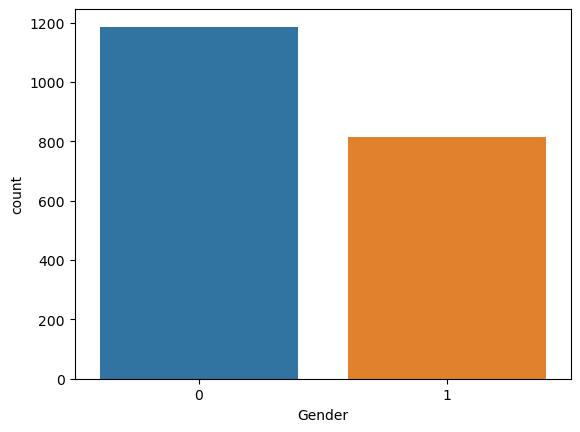

In [31]:
sns.countplot(data["Gender"])

1.upto 20% more no of customers are from female than male

#### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

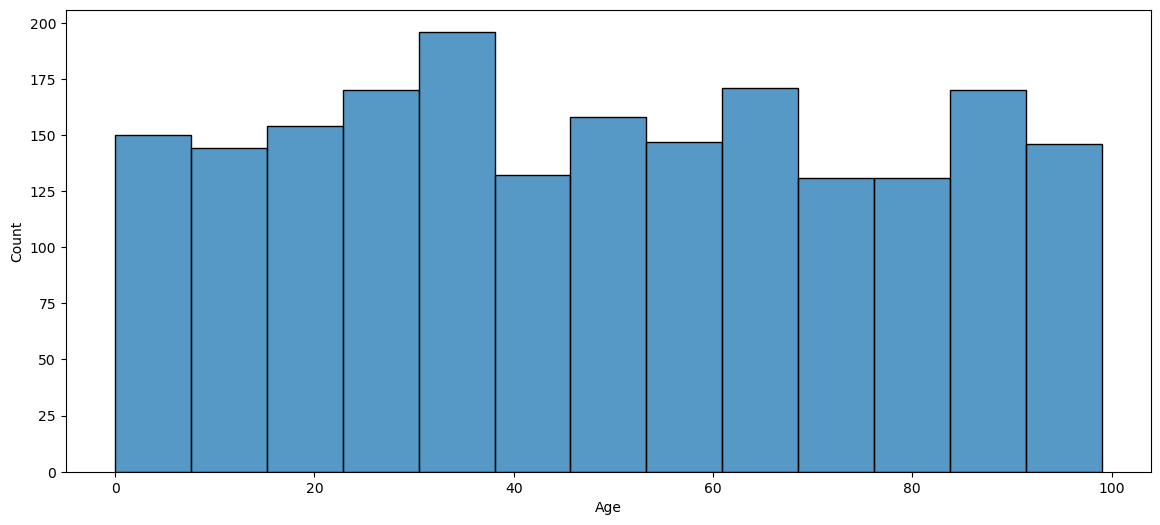

In [32]:
plt.figure(figsize=(14,6))
sns.histplot(data["Age"])

1.We can see the highest customers are from age group 28 to 38

<AxesSubplot:xlabel='Profession', ylabel='count'>

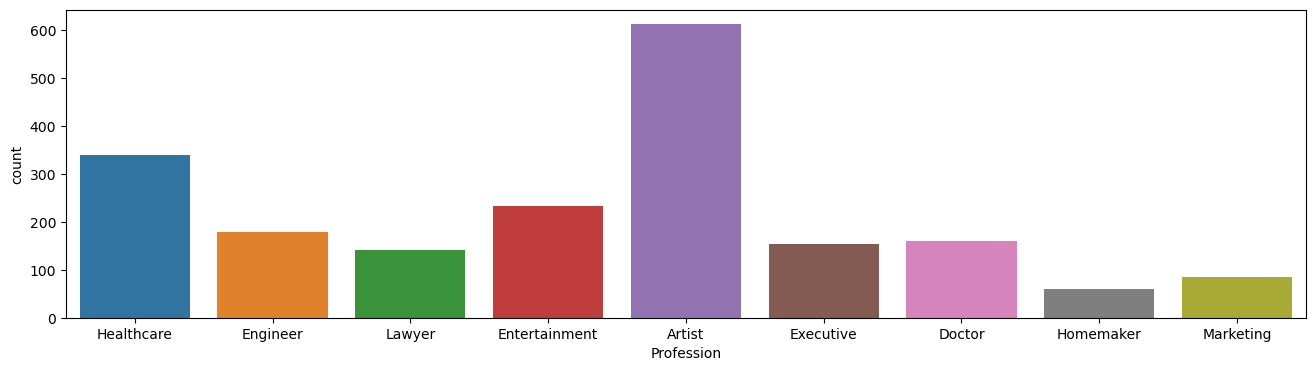

In [33]:
plt.figure(figsize=(16,4))
sns.countplot(data["Profession"])

1. from above graph we can see the "Artist profession" has more customers comparing to others
2. Whereas the minimum customers are from "Homemaker"

#### Annual Income

In [34]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

<AxesSubplot:xlabel='Annual Income ($)', ylabel='Count'>

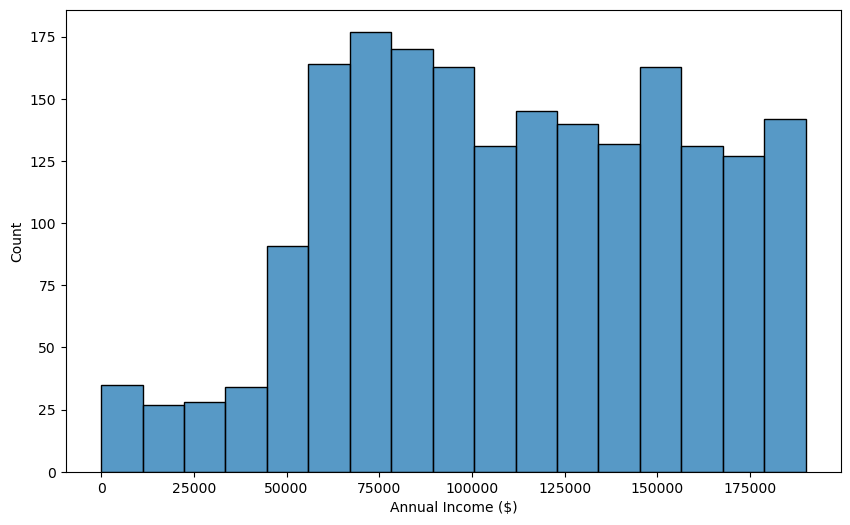

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data["Annual Income ($)"])

In [36]:
((data[data['Annual Income ($)']<30000].shape[0])/data.shape[0])*100

3.85

In [37]:
((data[data['Annual Income ($)']>30000].shape[0])/data.shape[0])*100

96.1

1. So from the above information we can say that about 96% customers has above "30000" dollars  annual income
2. 4% customers has less than "30000" dollars  annual income

<AxesSubplot:xlabel='Spending Score (1-100)'>

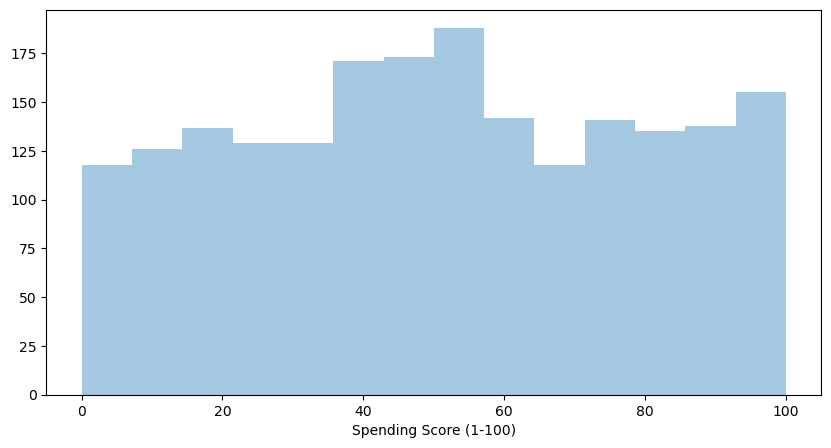

In [38]:
plt.figure(figsize=(10,5))
sns.distplot(data['Spending Score (1-100)'],kde=False)

In [39]:
(((data[(data["Spending Score (1-100)"]>60) & (data["Spending Score (1-100)"]<80)]).shape[0])/data.shape[0])*100

17.45

In [40]:
(((data[data["Spending Score (1-100)"]<60]).shape[0])/data.shape[0])*100

60.8

### bivariate analysis

#### Analysis of One Continuous and One Categorical Variables

In [41]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [42]:
def Oneclassnum(x,var1,var2,choice):
    if choice=="violin":
        plt.figure(figsize=(5,4))
        sns.violinplot(x[var1],x[var2])
    else:
        plt.figure(figsize=(5,4))
        sns.barplot(x[var1],x[var2])

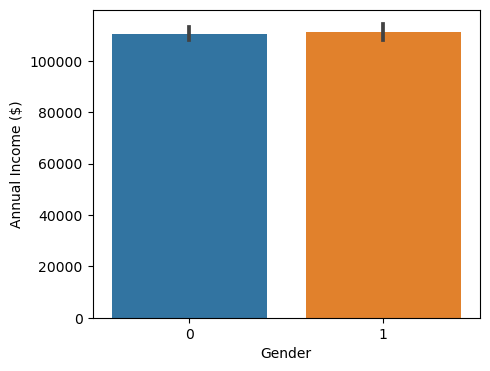

In [43]:
Oneclassnum(data,"Gender","Annual Income ($)","bar")

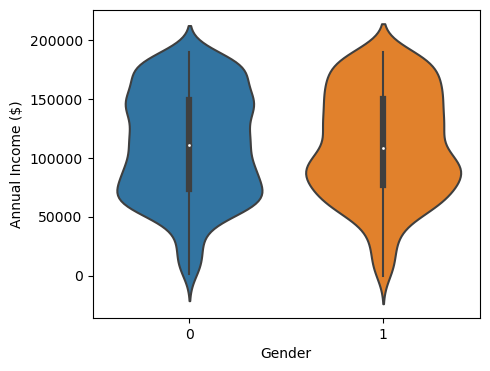

In [44]:
Oneclassnum(data,"Gender","Annual Income ($)","violin")

1. both male and female has high salary from 500000 to 180000 dollars
2. there less customers who has salary above 200000 dollars

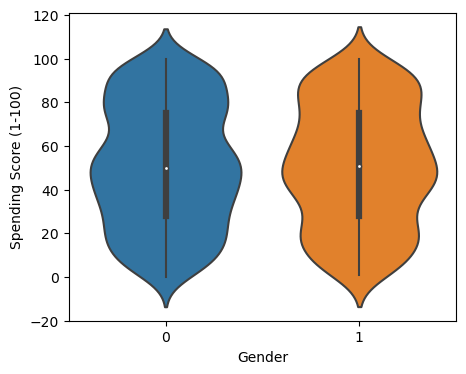

In [45]:
Oneclassnum(data,"Gender","Spending Score (1-100)","violin")

1. Spending score is maximum same for  both genders

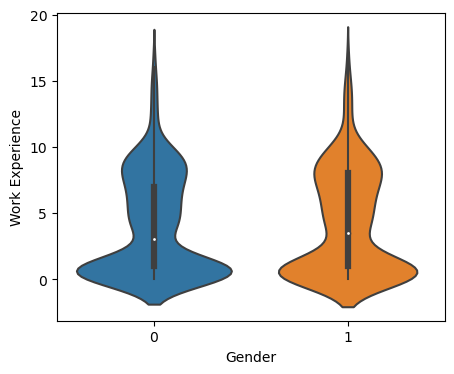

In [46]:
Oneclassnum(data,"Gender","Work Experience","violin")

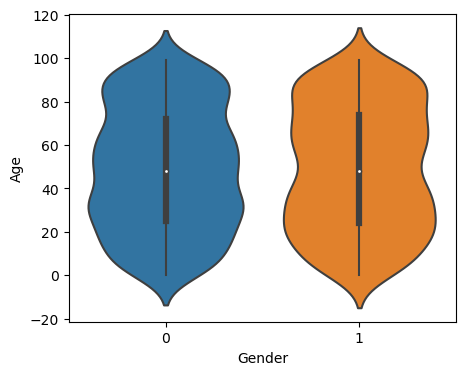

In [47]:
Oneclassnum(data,"Gender","Age","violin")

1. we can spenders of male are more between the score 0-20 than female.
2. both customers has high score between 25-60.
3. less score for above 100.

### Two Continuous Variables

In [48]:
def two_cont(x,var1,var2,choice):
    if choice=="seaborn":
        plt.figure(figsize=(8,5))
        sns.scatterplot(x[var1],x[var2])
    else:
        plt.figure(figsize=(8,5))
        plt.scatter(x[var1],x[var2])
        plt.show()


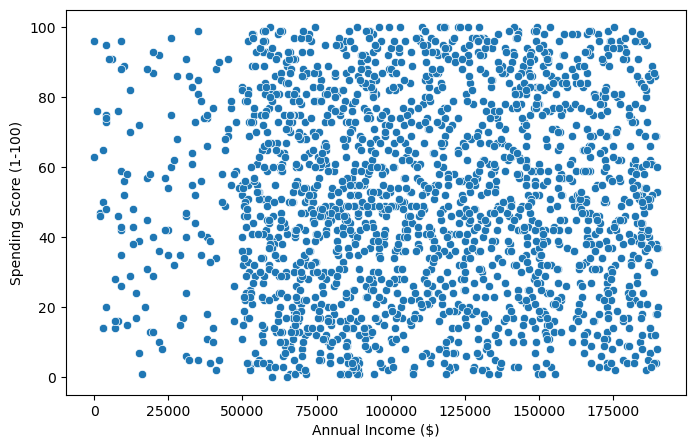

In [49]:
two_cont(data,"Annual Income ($)","Spending Score (1-100)","seaborn")

1. The spenders are low with income above 0 to below 50000
2. Whereas the spenders are high with high income


## Model Building

### Forming the clusters using K-elbow method

In [50]:
data2.head(3)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,0.000000,1.0,0.191919,0.078958,0.39,0.058824,0.375
1,0.000500,1.0,0.212121,0.184236,0.81,0.176471,0.250
2,0.001001,0.0,0.202020,0.452694,0.06,0.058824,0.000


In [51]:
data2=data2.drop("CustomerID",axis=1)

In [52]:
data2.head(3)

,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,1.0,0.191919,0.078958,0.39,0.058824,0.375
1,1.0,0.212121,0.184236,0.81,0.176471,0.250
2,0.0,0.202020,0.452694,0.06,0.058824,0.000


In [53]:
from sklearn.cluster import KMeans

In [54]:
clusters=[]
for i in range (1,11):
    km=KMeans(n_clusters=i)
    km.fit(data2)
    clusters.append(km.inertia_)

In [58]:
clusters

[1147.1405534623138,
 664.3849764683073,
 592.4709484166781,
 538.9423029101591,
 495.8881871546383,
 465.8081749391066,
 438.07850596313,
 415.7278118013229,
 398.0281627095748,
 381.2239771578829]

Text(0, 0.5, 'sum_of_squared_distances')

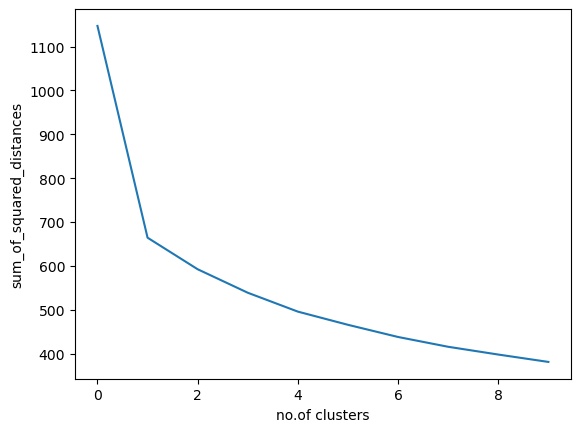

In [59]:
plt.plot(clusters)
plt.xlabel("no.of clusters")
plt.ylabel("sum_of_squared_distances")
        

### Forming 4 clusters

In [60]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,Healthcare,1,4
1,2,1,21,35000,81,Engineer,3,3
2,3,0,20,86000,6,Engineer,1,1
3,4,0,23,59000,77,Lawyer,0,2
4,5,0,31,38000,40,Entertainment,2,6


In [61]:
data=data.drop(["CustomerID","Profession"],axis=1)

In [62]:
km=KMeans(n_clusters=4)
km.fit(data)
km.labels_


array([2, 2, 0, ..., 0, 1, 3])

In [63]:
data["cluster"]=km.labels_

In [64]:
data.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
0,1,19,15000,39,1,4,2
1,1,21,35000,81,3,3,2
2,0,20,86000,6,1,1,0
3,0,23,59000,77,0,2,2
4,0,31,38000,40,2,6,2


In [65]:
### grouping using cluster
data.groupby("cluster").sum()

,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
cluster,,,,,,
0,270,31150.0,53085290,30884.0,2513.0,2257.0
1,205,24322.0,84285745,25218.0,2199.0,1914.0
2,133,16041.0,15795212,17701.0,1157.0,1225.0
3,206,26407.0,68297396,28122.0,2336.0,2141.0


In [66]:
data.groupby("cluster").describe().T

cluster                                   0              1             2  \
Gender                 count     621.000000     497.000000    352.000000   
                       mean        0.434783       0.412475      0.377841   
                       std         0.496128       0.492776      0.485538   
                       min         0.000000       0.000000      0.000000   
                       25%         0.000000       0.000000      0.000000   
                       50%         0.000000       0.000000      0.000000   
                       75%         1.000000       1.000000      1.000000   
                       max         1.000000       1.000000      1.000000   
Age                    count     621.000000     497.000000    352.000000   
                       mean       50.161031      48.937626     45.571023   
                       std        27.775944      29.287888     25.848023   
                       min         0.000000       0.000000      0.000000   
                       25%        28.000000      22.000000     25.000000   
                       50%        50.000000      48.000000     41.000000   
                       75%        73.000000      74.000000     65.000000   
                       max        99.000000      99.000000     99.000000   
Annual Income ($)      count     621.000000     497.000000    352.000000   
                       mean    85483.558776  169589.024145  44872.761364   
                       std     11920.738152   12055.621604  18752.980786   
                       min     65257.000000  149318.000000      0.000000   
                       25%     75178.000000  158372.000000  33000.000000   
                       50%     85568.000000  170133.000000  52458.500000   
                       75%     95000.000000  180702.000000  59022.000000   
                       max    107117.000000  189974.000000  65207.000000   
Spending Score (1-100) count     621.000000     497.000000    352.000000   
                       mean       49.732689      50.740443     50.286932   
                       std        27.845068      27.611194     27.787657   
                       min         1.000000       1.000000      0.000000   
                       25%        26.000000      29.000000     29.000000   
                       50%        49.000000      50.000000     50.000000   
                       75%        73.000000      76.000000     74.250000   
                       max       100.000000     100.000000    100.000000   
Work Experience        count     621.000000     497.000000    352.000000   
                       mean        4.046699       4.424547      3.286932   
                       std         3.949611       4.047954      3.486245   
                       min         0.000000       0.000000      0.000000   
                       25%         1.000000       1.000000      0.000000   
                       50%         3.000000       4.000000      1.000000   
                       75%         7.000000       8.000000      6.000000   
                       max        17.000000      17.000000     14.000000   
Family Size            count     621.000000     497.000000    352.000000   
                       mean        3.634461       3.851107      3.480114   
                       std         1.964205       1.983288      1.882488   
                       min         1.000000       1.000000      1.000000   
                       25%         2.000000       2.000000      2.000000   
                       50%         3.000000       4.000000      3.000000   
                       75%         5.000000       6.000000      5.000000   
                       max         8.000000       7.000000      9.000000   

cluster                                   3  
Gender                 count     530.000000  
                       mean        0.388679  
                       std         0.487911  
                       min         0.000000  
                       25%         0.000000  

#### Plotting the clusters

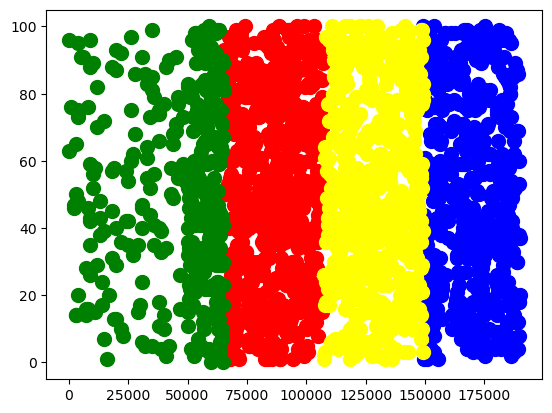

In [67]:
plt.scatter(data["Annual Income ($)"][data["cluster"]==0],data["Spending Score (1-100)"][data["cluster"]==0],s=100,c="red",label="cluster1")
plt.scatter(data["Annual Income ($)"][data["cluster"]==1],data["Spending Score (1-100)"][data["cluster"]==1],s=100,c="blue",label="cluster1")
plt.scatter(data["Annual Income ($)"][data["cluster"]==2],data["Spending Score (1-100)"][data["cluster"]==2],s=100,c="green",label="cluster1")
plt.scatter(data["Annual Income ($)"][data["cluster"]==3],data["Spending Score (1-100)"][data["cluster"]==3],s=100,c="yellow",label="cluster1")
plt.scatter(data["Annual Income ($)"][data["cluster"]==4],data["Spending Score (1-100)"][data["cluster"]==4],s=100,c="black",label="cluster1")


In [68]:
from sklearn.metrics import silhouette_score
silhouette_score(data,km.labels_)

0.5324127514105044